In [29]:
import pandas as pd
import numpy as np

import matplotlib.ticker as mtick
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from collections import Counter

import nltk

# Download the punkt tokenizer data
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

##### Data Set Importation

In [13]:
df_train = pd.read_csv("../datasets/Train.csv")
df_test =pd.read_csv("../datasets/Test.csv")
df_submi = pd.read_csv("../datasets/SampleSubmission.csv")

#### Data Cleaning 

In [6]:
df_train.head()

,review_file,content,sentiment
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive
1,9693_8.txt,I was very surprised with this film. I was tou...,positive
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive


In [7]:
df_test.head()

,review_file,content
0,0_10.txt,I went and saw this movie last night after bei...
1,0_2.txt,Once again Mr. Costner has dragged out a movie...
2,10000_4.txt,This is an example of why the majority of acti...
3,10000_7.txt,Actor turned director Bill Paxton follows up h...
4,10001_1.txt,"First of all I hate those moronic rappers, who..."


In [8]:
df_submi.head()

,review_file,sentiment
0,0_10.txt,negative
1,0_2.txt,negative
2,10000_4.txt,negative
3,10000_7.txt,negative
4,10001_1.txt,negative


In [9]:
print(df_train.dtypes)
print(df_test.dtypes)
print(df_submi.dtypes)

review_file    object
content        object
sentiment      object
dtype: object
review_file    object
content        object
dtype: object
review_file    object
sentiment      object
dtype: object


In [10]:
print(df_train.shape)
print(df_test.shape)
print(df_submi.shape)

(25000, 3)
(25000, 2)
(25000, 2)


#### Investigation of Missing Values

In [12]:
print(df_train.isna().sum())
print(df_test.isna().sum())
print(df_submi.isna().sum())

review_file    0
content        0
sentiment      0
dtype: int64
review_file    0
content        0
dtype: int64
review_file    0
sentiment      0
dtype: int64


##### There is no missing Values in our all of our datasets both Training dataset and Test, and Submission dataset which is very clucial when we are training and preprocessing our data.

In [24]:
print(df_train['sentiment'].unique())
#print(df_test['sentiment'].unique())
print(df_submi['sentiment'].unique())

['positive' 'negative']
['negative']


Exploratory Data Analysis

*Class Distribution Analysis*

Examine the distribution of the "sentiment" column to understand the balance between different classes (e.g., positive, negative).

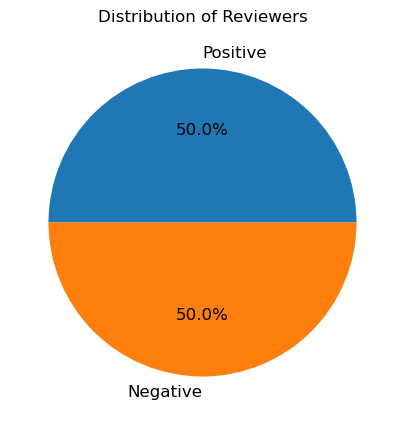

In [22]:
ax = (df_train['sentiment'].value_counts()*100.0 /len(df_train))\
.plot.pie(autopct='%.1f%%', labels = ['Positive', 'Negative'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('',fontsize = 12)
ax.set_title('Distribution of Reviewers', fontsize = 12)

plt.show()

##### Text or Content Analysis

Explore the length of the "Content or text" column (number of characters or words).

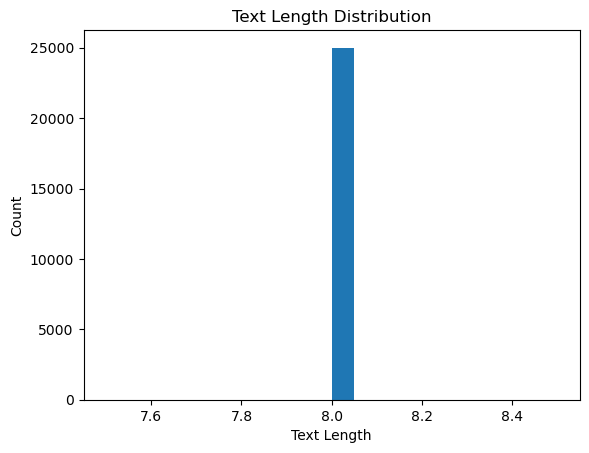

In [25]:
# Calculate the length of each text
df_train['text_length'] = df_train['sentiment'].apply(lambda x: len(x))

# Plot the text length distribution
plt.hist(df_train['text_length'], bins=20)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.show()

In [28]:
# Combine all the texts into a single string
all_text = ' '.join(df_train['sentiment'])

# Tokenize the text into individual words
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Get the top 10 most used words
top_10_words = word_freq.most_common(10)

# Print the top 10 words and their frequencies
for word, freq in top_10_words:
    print(f"Word: {word}\tFrequency: {freq}")

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\HP/nltk_data'
    - 'c:\\Users\\HP\\anaconda3\\nltk_data'
    - 'c:\\Users\\HP\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\HP\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
